mpg: miles per gallon

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime as dt

In [3]:
import seaborn as sns

# Ingestion

In [4]:
dfAuto = pd.read_csv('data/auto-mpg.csv')
dfAuto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


# Data preparation

In [5]:
# no nulls found
dfAuto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
# checking whether any column contains the string '?'
    # axis=0 --> reduce the index, return a Series whose index is the original column labels.
    # axis=1 --> reduce the columns, return a Series whose index is the original index.
(dfAuto == '?').any(axis=0)

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [7]:
# replacing '?' with NaNs
dfAuto.replace('?', np.nan, inplace=True)

In [8]:
# count NAs in every column
dfAuto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [9]:
# very few NAs present in the data
# dropping all observations with NAs
dfAuto.dropna(inplace=True)
dfAuto.shape

(392, 9)

In [10]:
dfAuto.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
351,34.4,4,98.0,65,2045,16.2,81,1,ford escort 4w
247,39.4,4,85.0,70,2070,18.6,78,3,datsun b210 gx
157,15.0,8,350.0,145,4440,14.0,75,1,chevrolet bel air
180,25.0,4,121.0,115,2671,13.5,75,2,saab 99le
193,24.0,6,200.0,81,3012,17.6,76,1,ford maverick


origin and carname are irrelevant to a car's mpg. 
they must be dropped.

In [11]:
dfAuto.drop(labels=['origin', 'car name'], axis='columns', inplace=True)
dfAuto.shape

(392, 7)

model year can be converted to model age

In [12]:
# prefixing 19 to convert to YYYY format
dfAuto['model year'] = '19' + dfAuto['model year'].astype('str') 

In [13]:
# computing age from model year
dfAuto['age'] = dt.now().year - dfAuto['model year'].astype(int)

In [14]:
# dropping model year
dfAuto.drop(labels='model year', axis='columns', inplace=True)

In [15]:
# horsepower is an integer variable, but it is formatted as str
print(dfAuto.dtypes)
dfAuto.sample(10)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object


,mpg,cylinders,displacement,horsepower,weight,acceleration,age
66,17.0,8,304.0,150,3672,11.5,53
0,18.0,8,307.0,130,3504,12.0,55
48,18.0,6,250.0,88,3139,14.5,54
54,35.0,4,72.0,69,1613,18.0,54
324,40.8,4,85.0,65,2110,19.2,45
205,28.0,4,97.0,75,2155,16.4,49
368,27.0,4,112.0,88,2640,18.6,43
310,38.1,4,89.0,60,1968,18.8,45
154,15.0,6,250.0,72,3432,21.0,50
159,14.0,8,351.0,148,4657,13.5,50


In [16]:
# converting object to int
dfAuto['horsepower'] = pd.to_numeric(dfAuto['horsepower'], errors='raise')
dfAuto.horsepower.dtype


dtype('int64')

In [17]:
# summary statistics
dfAuto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,49.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,43.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,46.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,49.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,52.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,55.000000


# Exploratory Data Analysis

<Axes: xlabel='age', ylabel='mpg'>

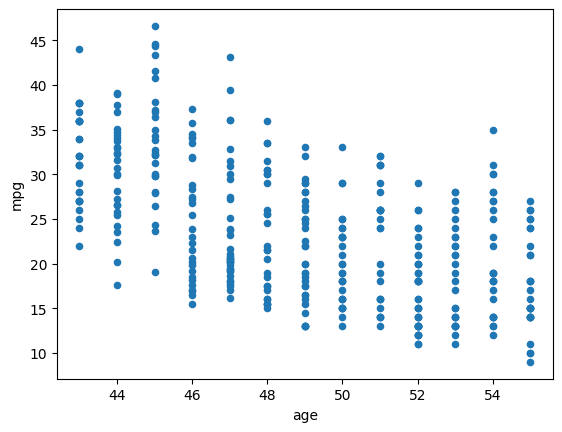

In [18]:
# scatter plot shows that mpg drops with age
dfAuto.plot.scatter(x='age', y='mpg', xlabel='age', ylabel='mpg')

<Axes: xlabel='acceleration', ylabel='mpg'>

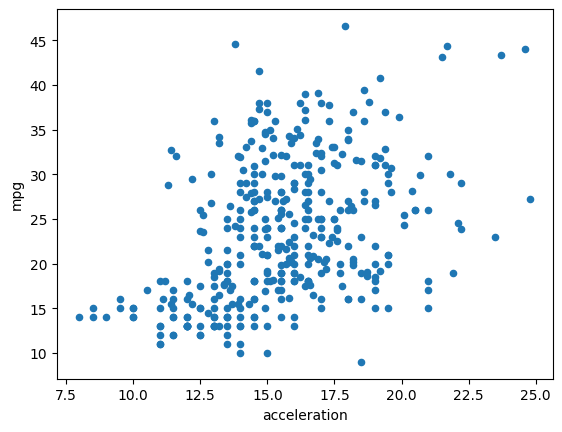

In [19]:
# scatter plot shows that mpg increases* with acceleration
dfAuto.plot.scatter(x='acceleration', y='mpg', xlabel='acceleration', ylabel='mpg')

In [20]:
# to find how all variables correlate to one another use the correlation matrix
dfCorrAuto = dfAuto.corr()
dfCorrAuto

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


<Axes: >

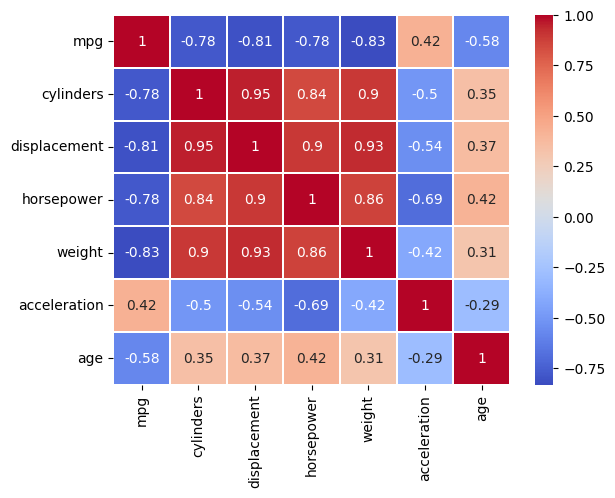

In [21]:
sns.heatmap(dfCorrAuto, annot=True, cmap='coolwarm', linewidths=0.1)

shuffling the df to avoid feeding inadverdent patterns in the data to the model

In [22]:
# the sample funtion can be used to return the shuffled (full) dataset, by setting frac=1
dfAuto = dfAuto.sample(frac=1).reset_index(drop=True)

In [23]:
# exporting the treated dataset
dfAuto.to_csv('data/auto-mpg-treated.csv')